In [7]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from lafomo.datasets import DrosophilaSpatialTranscriptomics, HomogeneousReactionDiffusion
from pathlib import Path
from lafomo.plot import Colours, tight_kwargs

(10, 600, 2) (10, 600, 2)


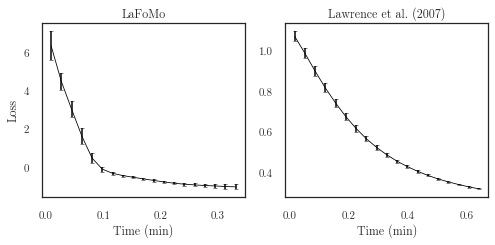

In [55]:
varia = np.load(f'./varia_times.npy')
exact = np.load(f'./exact_times.npy')
print(varia.shape, exact.shape)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 0.8*4))

for i, (profile, name) in enumerate(zip([varia, exact], ['LaFoMo', 'Lawrence et al. (2007)'])):
    ax = axes[i]
    times = profile[:, :, 0]
    times = times - times.min(1).reshape(profile.shape[0], 1)
    times_mean = times.mean(0) / 60
    losses = profile[:, :, 1]
    time_intervals = np.linspace(times_mean.min(), times_mean.max(), 20)
    xs = list()
    ys = list()
    ax.set_title(name)
    for j in range(time_intervals.shape[0]-1):
        lb = time_intervals[j]
        ub = time_intervals[j+1]
        ind = (times_mean > lb) & (times_mean < ub)
        x = (lb + ub)/2
        y = losses[:, ind].mean()
        ax.errorbar(x, y, losses[:, ind].std(),
                    color='black', capsize=2, markeredgewidth=0.5)
        xs.append(x)
        ys.append(y)
    ax.plot(xs, ys, color='black', linewidth=0.8)
    ax.set_xlabel('Time (min)')
axes[0].set_ylabel('Loss')
plt.savefig(f'convergence_p53.pdf', **tight_kwargs)


In [2]:
from experiments.partial import build_partial, plot_partial

drosophila = False

if drosophila:
    data = 'dros-kr'
    dataset = DrosophilaSpatialTranscriptomics(gene='kr', data_dir='../data', scale=True)
    params = dict(lengthscale=10,
                  sensitivity=0.0970,
                  decay=0.0764,
                  diffusion=0.0015,
                  parameter_grad=False,
                  warm_epochs=-1,
                  natural=False,
                  clamp=True)
else:
    data = 'toy-spatial'
    dataset = HomogeneousReactionDiffusion(data_dir='../data')
    params = dict(lengthscale=0.3,
                  sensitivity=1,
                  decay=0.1,
                  diffusion=0.01,
                  natural=False,
                  clamp=False)

filepath = lambda name: np.load(f'./{data}/partial/{name}.npy')
loss_with = filepath('loss_with')
loss_without = filepath('loss_without')
time_with = filepath('time_with')
time_without = filepath('time_without')

(1, 240) (1, 160)


/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/jacob/miniconda3/envs/wishart/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/jacob/miniconda

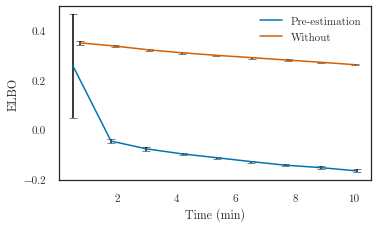

In [3]:
plt.figure(figsize=(0.8*7, 0.8*4))
def plot_errorbars(times, losses, nbins=12, start_index=0, color='black', label='', skip_last=0):
    times = times[:, start_index:-skip_last]
    losses = losses[:, start_index:-skip_last]
    bucket_ind = np.digitize(
        times, np.linspace(times.min(), times.max(), nbins))

    mean_times = list()
    mean_losses = list()
    for i in range(10):
        time_bucket = times[bucket_ind == i]
        loss_bucket = losses[bucket_ind == i]
        mean_times.append(time_bucket.mean(0))
        mean_losses.append(loss_bucket.mean(0))
        plt.errorbar(time_bucket.mean(0), loss_bucket.mean(0), loss_bucket.std(0),
                     color='black', capsize=4, markeredgewidth=0.5)
    plt.plot(mean_times, mean_losses, color=color, label=label)

# these errorbars are incorrect. try for example with one sample.
print(time_with.shape, time_without.shape)
plot_errorbars(time_with, loss_with,
               color=Colours.line_color,
               skip_last=80,
               start_index=0, label='Pre-estimation')
plot_errorbars(time_without, loss_without,
               skip_last=80,
               color=Colours.scatter_color, label='Without')
# plt.ylim(-0.2, 2)
plt.xlabel('Time (min)')
plt.ylabel('ELBO')
plt.legend()
plt.savefig('preestimation_toy.pdf', **tight_kwargs)


t_sorted, dp [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ] 0.025
x dp is set to 0.025
t_sorted, dp [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ] 0.025


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


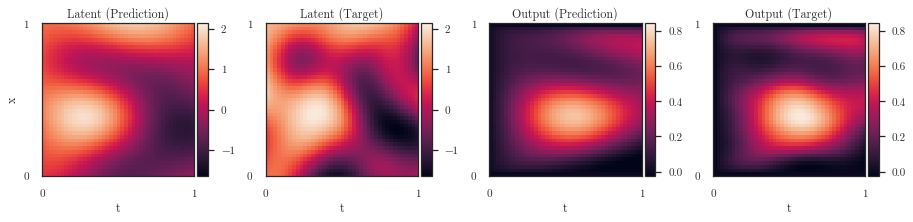

In [4]:
lfm, trainer, plotter = build_partial(
    dataset,
    params,
    reload=f'{data}/partial/model_with_0')
plot_partial(dataset, lfm, trainer, plotter, Path('./'), params)

t_sorted, dp [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ] 0.025
x dp is set to 0.025
t_sorted, dp [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ] 0.025


'cmunrm.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


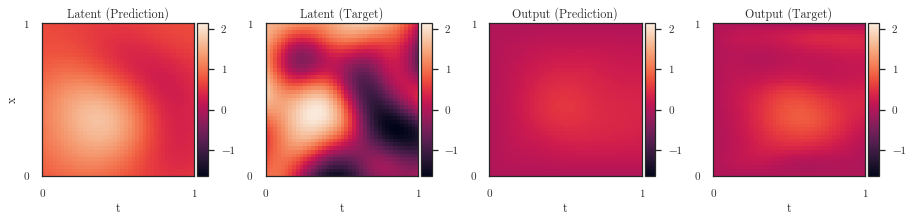

In [5]:
lfm, trainer, plotter = build_partial(
    dataset,
    params,
    reload=f'{data}/partial/model_without_0')
plot_partial(dataset, lfm, trainer, plotter, Path('./'), params)

In [8]:
trace_with = torch.load(f'{data}/partial/parameter_trace_with_0.pt')
trace_without = torch.load(f'{data}/partial/parameter_trace_without_0.pt')

[(3, 4), (3, 4), (3, 4), (3, 4), (3, 4)]

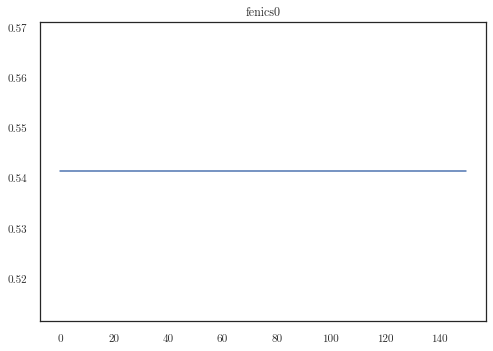

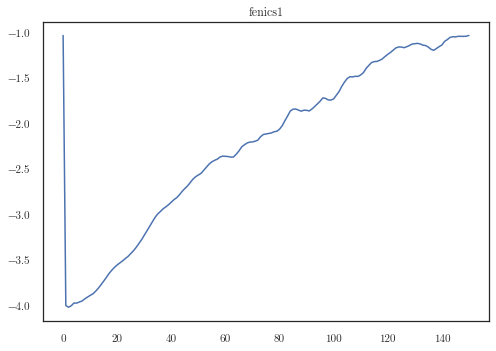

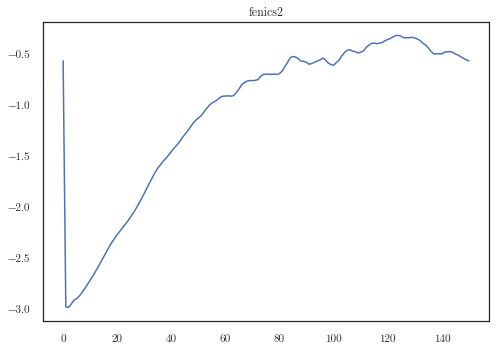

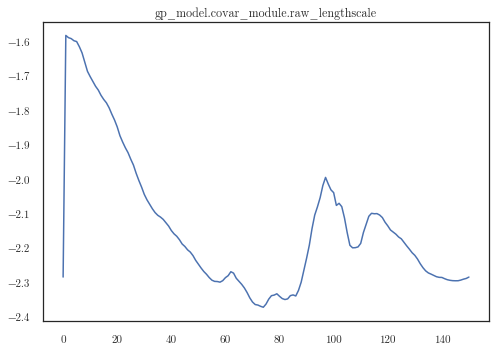

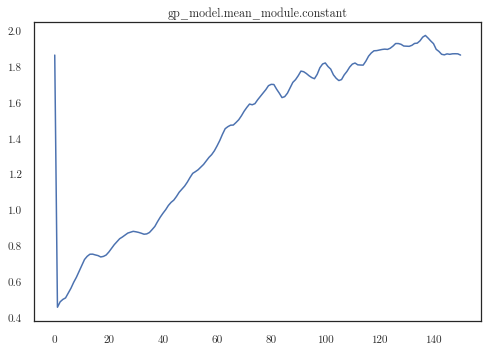

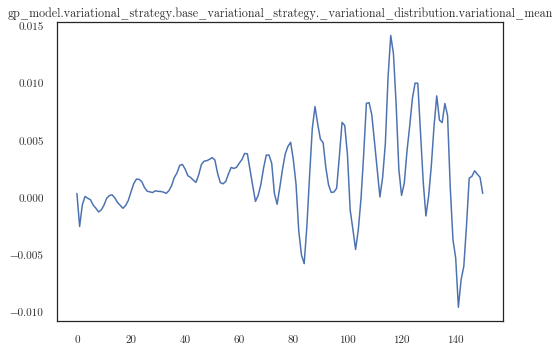

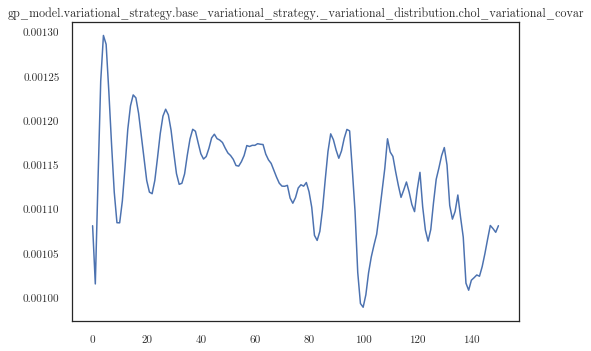

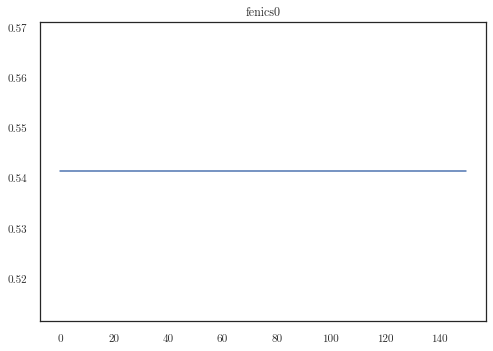

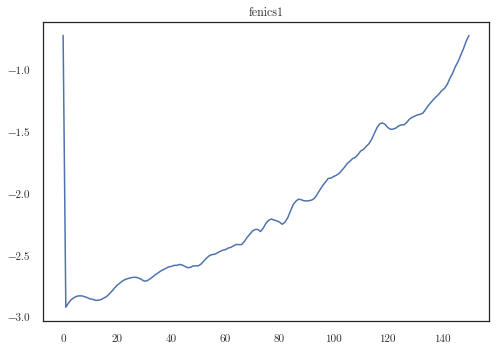

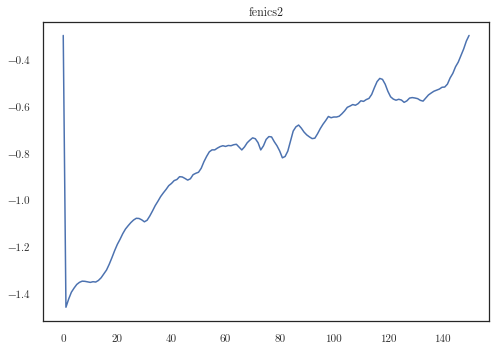

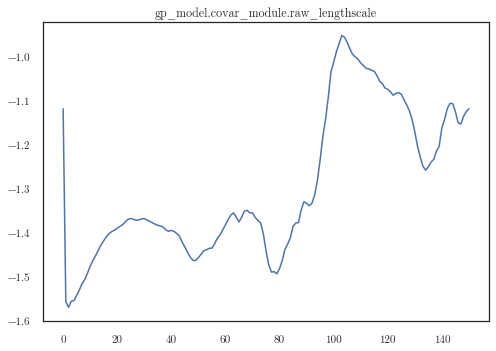

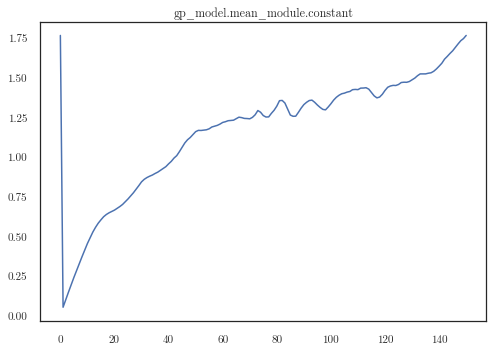

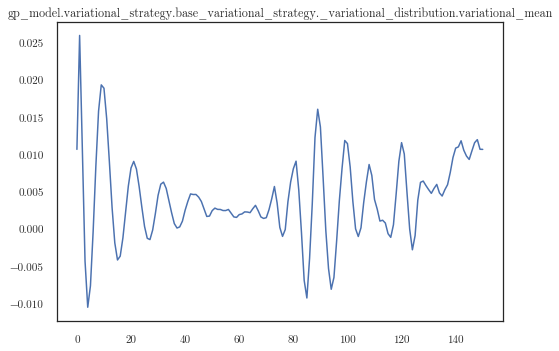

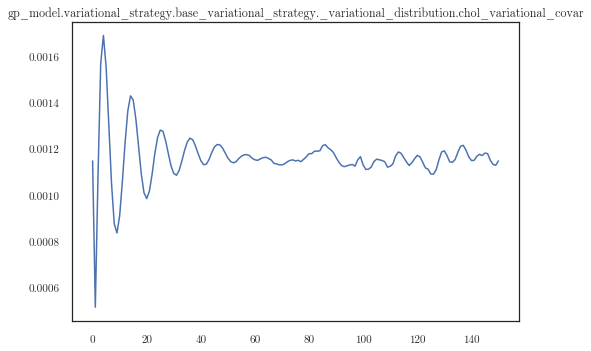

In [5]:
def plot_trace(trace):
    for key in trace.keys():
        params = trace[key]
        plt.figure()
        plt.plot(params)
        plt.title(key)
plot_trace(trace_with)
plot_trace(trace_without)